In [250]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from pandas.api.types import is_numeric_dtype
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split

In [251]:
#loading dataset
df = pd.read_csv("hospital_readmission_decision_tree_dataset.csv")

In [252]:
# seeing 1st 5 row
df.head()

,Age,Blood_Pressure,BMI,Diabetes,Days_Admitted,Previous_Visits,Chronic_Disease,Readmitted
0,69,188.0,NaN,No,5,2,Yes,No
1,32,100.0,NaN,Yes,5,2,Yes,No
2,89,102.0,23.0,Yes,20,0,No,No
3,78,186.0,23.4,Yes,15,2,No,No
4,38,198.0,29.0,No,18,1,No,No


In [253]:
#seeing info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              800 non-null    int64  
 1   Blood_Pressure   680 non-null    float64
 2   BMI              694 non-null    float64
 3   Diabetes         800 non-null    object 
 4   Days_Admitted    800 non-null    int64  
 5   Previous_Visits  800 non-null    int64  
 6   Chronic_Disease  800 non-null    object 
 7   Readmitted       800 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 50.1+ KB


In [254]:
#seeing dataset shape
df.shape

(800, 8)

In [255]:
#seeing duplicated
df.duplicated().sum()

np.int64(0)

In [256]:
#seeing NAN value
df.isna().sum()

Age                  0
Blood_Pressure     120
BMI                106
Diabetes             0
Days_Admitted        0
Previous_Visits      0
Chronic_Disease      0
Readmitted           0
dtype: int64

Visualization

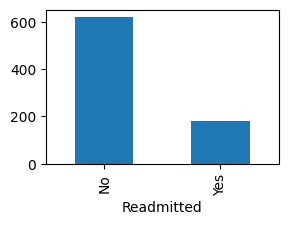

In [257]:
plt.figure(figsize=(3,2))
df['Readmitted'].value_counts().plot(kind='bar')
plt.show()

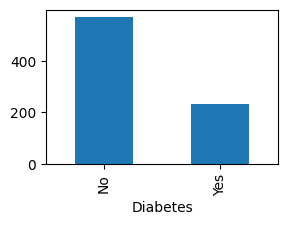

In [258]:
plt.figure(figsize=(3,2))
df['Diabetes'].value_counts().plot(kind='bar')
plt.show()

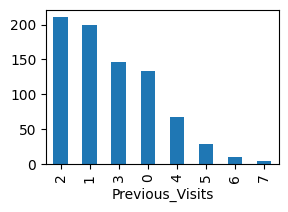

In [259]:
plt.figure(figsize=(3,2))
df['Previous_Visits'].value_counts().plot(kind='bar')
plt.show()

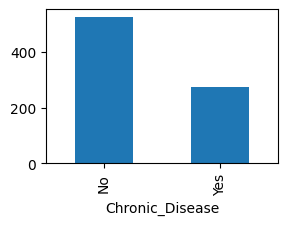

In [260]:
plt.figure(figsize=(3,2))
df['Chronic_Disease'].value_counts().plot(kind='bar')
plt.show()

In [261]:
sel_col = df[['Age', 'Blood_Pressure', 'BMI', 'Days_Admitted']]

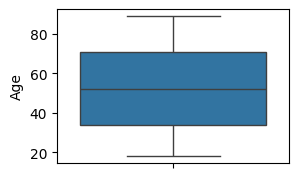

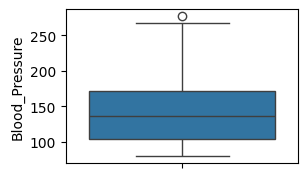

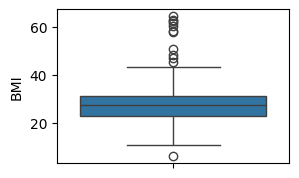

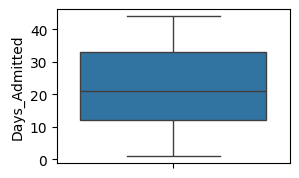

In [262]:
for col in sel_col:
    plt.figure(figsize=(3,2))
    sns.boxplot(df[col])
    plt.show()

In [263]:
# counting outlier
outlierCount = {}
for col2 in df.select_dtypes(include='number').columns:
    q1 = df[col2].quantile(.25)
    q3 = df[col2].quantile(.75)

    iqr = q3 - q1

    up_wh = q3 + 1.5 * iqr
    low_wh = q1 - 1.5 * iqr

    counts = (df[col2] < low_wh) | (df[col2] > up_wh)
    outlierCount[col2] = counts.sum()

outlier_df = pd.DataFrame(
    {
        'columns': outlierCount.keys(),
        'Outlier_counts': outlierCount.values()
    }
)
outlier_df

,columns,Outlier_counts
0,Age,0
1,Blood_Pressure,1
2,BMI,12
3,Days_Admitted,0
4,Previous_Visits,4


In [264]:
#removing outlier using boxplot
def outlier(df, col3):
    q1 = df[col3].quantile(.25)
    q3 = df[col3].quantile(.75)

    iqr = q3 - q1

    up_wh = q3 + 1.5 * iqr
    low_wh = q1 - 1.5 * iqr

    return df[(df[col3] >= low_wh) & (df[col3] <= up_wh)]

In [265]:
#selecting column for removing outlier
sel_col = df[['BMI', 'Previous_Visits']]

In [266]:
#coping main dataset
df_clean = df.copy()

In [267]:
#now removing outlier
for col4 in sel_col:
    df_clean = outlier(df_clean, col4)

In [268]:
#cleaned outlier copy to main dataset
df = df_clean.copy()

In [269]:
#agin seeing outlier
outlierCount = {}
for col2 in df.select_dtypes(include='number').columns:
    q1 = df[col2].quantile(.25)
    q3 = df[col2].quantile(.75)

    iqr = q3 - q1

    up_wh = q3 + 1.5 * iqr
    low_wh = q1 - 1.5 * iqr

    counts = (df[col2] < low_wh) | (df[col2] > up_wh)
    outlierCount[col2] = counts.sum()

outlier_df = pd.DataFrame(
    {
        'columns': outlierCount.keys(),
        'Outlier_counts': outlierCount.values()
    }
)
outlier_df

,columns,Outlier_counts
0,Age,0
1,Blood_Pressure,1
2,BMI,0
3,Days_Admitted,0
4,Previous_Visits,0


In [270]:
#now using z score for removing outlier
def outlier2(df, col4):
    mean_val = df[col4].mean()
    std_val = df[col4].std()

    z_score = (df[col4] - mean_val) / std_val

    return df[(z_score >= -3) & (z_score <= 3)]

In [271]:
sel_col2 = df[['BMI', 'Previous_Visits']]

In [272]:
df_clean = df.copy()

In [273]:
for col5 in sel_col2:
    df_clean = outlier2(df_clean, col5)

In [274]:
df = df_clean.copy()

In [275]:
outlierCount = {}
for col2 in df.select_dtypes(include='number').columns:
    q1 = df[col2].quantile(.25)
    q3 = df[col2].quantile(.75)

    iqr = q3 - q1

    up_wh = q3 + 1.5 * iqr
    low_wh = q1 - 1.5 * iqr

    counts = (df[col2] < low_wh) | (df[col2] > up_wh)
    outlierCount[col2] = counts.sum()

outlier_df = pd.DataFrame(
    {
        'columns': outlierCount.keys(),
        'Outlier_counts': outlierCount.values()
    }
)
outlier_df

,columns,Outlier_counts
0,Age,0
1,Blood_Pressure,1
2,BMI,0
3,Days_Admitted,0
4,Previous_Visits,0


In [276]:
#again seeing NAN value
df.isna().sum()

Age                  0
Blood_Pressure     107
BMI                  0
Diabetes             0
Days_Admitted        0
Previous_Visits      0
Chronic_Disease      0
Readmitted           0
dtype: int64

In [277]:
#agein seeing shape
df.shape

(679, 8)

In [278]:
#filling NAN value
df['Blood_Pressure'] = df['Blood_Pressure'].fillna(df['Blood_Pressure'].mean())

In [279]:
df.head()

,Age,Blood_Pressure,BMI,Diabetes,Days_Admitted,Previous_Visits,Chronic_Disease,Readmitted
2,89,102.000000,23.0,Yes,20,0,No,No
3,78,186.000000,23.4,Yes,15,2,No,No
4,38,198.000000,29.0,No,18,1,No,No
5,41,137.347902,21.0,No,2,2,No,Yes
6,20,126.000000,29.4,No,29,3,No,Yes


In [280]:
#feature scalling
le = LabelEncoder()
scaler = StandardScaler()

In [281]:
for col6 in df.columns:
    if is_numeric_dtype(df[col6]):
        df[col6] = scaler.fit_transform(df[[col6]])
    else:
        df[col6] = le.fit_transform(df[col6])

In [282]:
df.head()

,Age,Blood_Pressure,BMI,Diabetes,Days_Admitted,Previous_Visits,Chronic_Disease,Readmitted
2,1.737211,-1.047373,-0.709224,1,-0.163477,-1.368593,0,0
3,1.212981,1.441582,-0.639578,1,-0.564493,0.082265,0,0
4,-0.693312,1.797148,0.335457,0,-0.323884,-0.643164,0,0
5,-0.550340,0.000000,-1.057450,0,-1.607134,0.082265,0,1
6,-1.551144,-0.336243,0.405102,0,0.558351,0.807694,0,1


<Axes: >

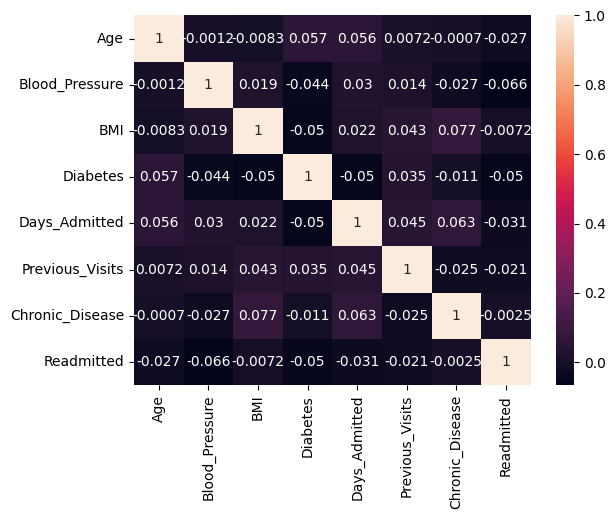

In [283]:
sns.heatmap(df.corr(), annot=True)

In [284]:
#feature / target split
x = df.drop(['Readmitted'], axis=1)
y = df[['Readmitted']]

In [285]:
x.head()

,Age,Blood_Pressure,BMI,Diabetes,Days_Admitted,Previous_Visits,Chronic_Disease
2,1.737211,-1.047373,-0.709224,1,-0.163477,-1.368593,0
3,1.212981,1.441582,-0.639578,1,-0.564493,0.082265,0
4,-0.693312,1.797148,0.335457,0,-0.323884,-0.643164,0
5,-0.550340,0.000000,-1.057450,0,-1.607134,0.082265,0
6,-1.551144,-0.336243,0.405102,0,0.558351,0.807694,0


In [286]:
#implementing smote
smote = SMOTE()

In [287]:
x.shape, y.shape

((679, 7), (679, 1))

In [288]:
new_x, new_y = smote.fit_resample(x, y)
new_x.shape, new_x.shape

((1044, 7), (1044, 7))

In [289]:
new_y.value_counts()

Readmitted
0             522
1             522
Name: count, dtype: int64

In [290]:
# train test split
xtrain, xtest, ytrain, ytest = train_test_split(new_x, new_y, test_size=0.2, random_state=42)

In [291]:
xtrain.head()

,Age,Blood_Pressure,BMI,Diabetes,Days_Admitted,Previous_Visits,Chronic_Disease
531,1.022351,1.708256,1.084144,0,-0.885306,1.533123,1
256,-0.883942,-0.602917,1.031910,0,-0.163477,0.807694,0
350,-0.121424,-0.662178,2.111413,0,1.520789,-0.643164,1
60,-0.455026,1.411952,-0.030181,0,-0.644696,-0.643164,1
930,0.792131,-1.078488,-0.225255,1,-0.300751,-0.704555,1


In [292]:
ytrain.head()

,Readmitted
531,0
256,0
350,0
60,0
930,1


In [293]:
#model implementation
decision = DecisionTreeClassifier()

In [294]:
#model train
tree_model = decision.fit(xtrain, ytrain)

In [295]:
#train score testing
tree_model.score(xtrain, ytrain)

1.0

In [296]:
#test score testing
tree_model.score(xtest, ytest)

0.6555023923444976

In [297]:
#prediction
pred_y = tree_model.predict(xtest)

In [298]:
#confusion metrics
cm = confusion_matrix(ytest, pred_y)
cm

array([[72, 42],
       [30, 65]])

<Axes: >

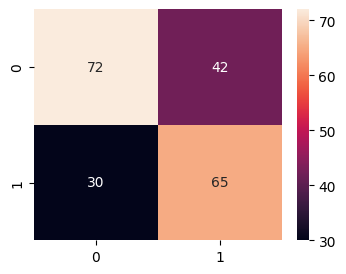

In [299]:
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True)

In [300]:
#classification report
cl = classification_report(ytest, pred_y)
print(cl)

              precision    recall  f1-score   support

           0       0.71      0.63      0.67       114
           1       0.61      0.68      0.64        95

    accuracy                           0.66       209
   macro avg       0.66      0.66      0.66       209
weighted avg       0.66      0.66      0.66       209



In [301]:
#accuracy score 
ac = accuracy_score(ytest, pred_y)
ac

0.6555023923444976

In [302]:
#f1 score
f1 = f1_score(ytest, pred_y)
f1

0.6435643564356436

In [303]:
#ruc auc score
ruc_auc = roc_auc_score(ytest, pred_y)
ruc_auc

0.6578947368421052

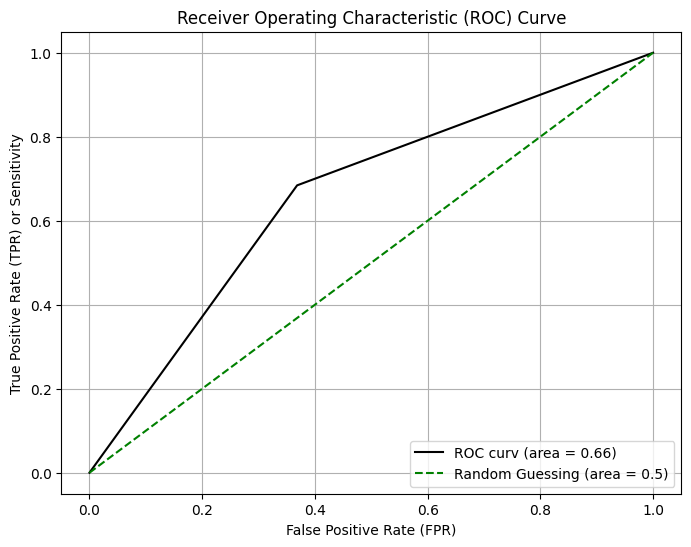

In [304]:
#ROC curve
fpr, tpr, thresholds = roc_curve(ytest, pred_y)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='black', label = f'ROC curv (area = {roc_auc:.2f})')
plt.plot([0,1],[0,1], color='green', linestyle='--', label = 'Random Guessing (area = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()